<a href="https://colab.research.google.com/github/EjbejaranosAI/DL/blob/main/Cifar10_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [15]:
(train_images, train_labels), (test_images, test_labels)= datasets.cifar10.load_data()

In [3]:
print(len(train_images))
print(len(train_labels))
print(len(test_images))
print(len(test_labels))

50000
50000
10000
10000


In [10]:
train_images[0].max()
# Normalizar los valores que tenemos en las imagenes

255

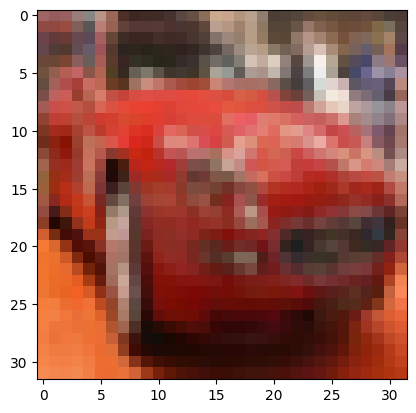

In [16]:
plt.imshow(train_images[5])

In [17]:
train_images, test_images = train_images/255.0, test_images/255.0

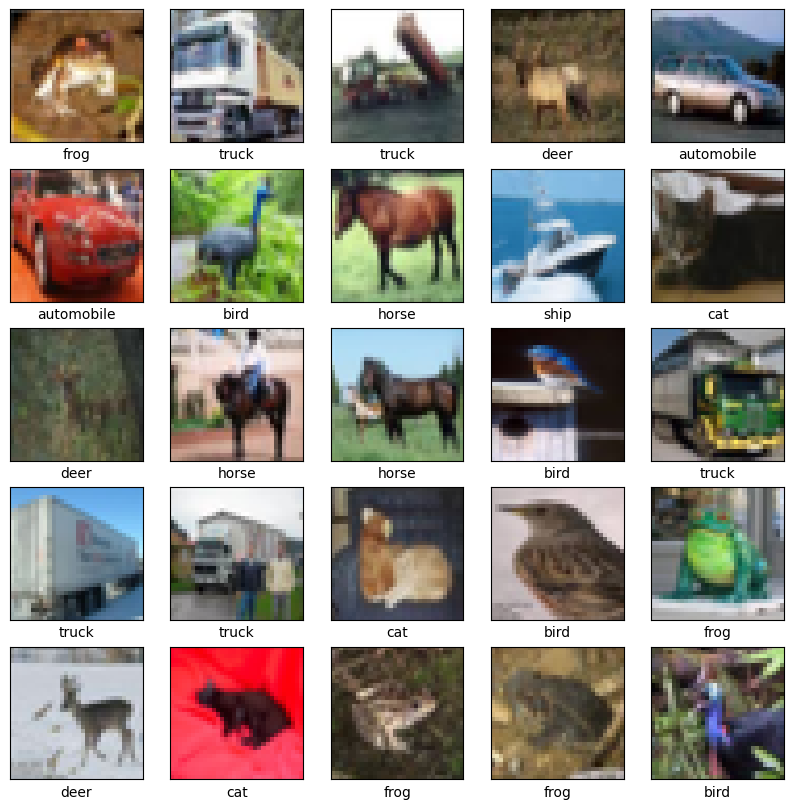

In [18]:
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(train_images[i])
  plt.xlabel(class_names[train_labels[i][0]])

plt.show()



# Creating our new CNN network

In [39]:
# Instanciando secuancia de capas
model1 = models.Sequential()
#Creando input layer
model1.add(layers.Conv2D(32,(3,3), activation='relu', input_shape=(32,32,3)))

# Creando feature extraction layers
model1.add(layers.MaxPooling2D(2,2))
model1.add(layers.Conv2D(64,(3,3), activation='relu'))
model1.add(layers.MaxPooling2D(2,2))
model1.add(layers.Conv2D(64,(3,3), activation='relu'))
# Creando classification layers
model1.add(layers.Flatten())
model1.add(layers.Dense(64, activation='relu'))
model1.add(layers.Dropout(0.4))
model1.add(layers.Dense(64, activation='relu'))
model1.add(layers.Dropout(0.3))
model1.add(layers.Dense(10))

model1.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 4, 4, 64)          36928     
                                                                 
 flatten_5 (Flatten)         (None, 1024)             

In [40]:
# Compilar nuestra network
model1.compile(optimizer='adam',
               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
               metrics=['accuracy'])

In [41]:
history = model1.fit(train_images, train_labels, epochs= 20, validation_data = (test_images, test_labels))

Epoch 1/20
1563/1563 [==============================] - 11s 6ms/step - loss: 1.7935 - accuracy: 0.3215 - val_loss: 1.5325 - val_accuracy: 0.4588
Epoch 2/20
1563/1563 [==============================] - 9s 6ms/step - loss: 1.4348 - accuracy: 0.4870 - val_loss: 1.2449 - val_accuracy: 0.5483
Epoch 3/20
1563/1563 [==============================] - 10s 6ms/step - loss: 1.2887 - accuracy: 0.5442 - val_loss: 1.1508 - val_accuracy: 0.5926
Epoch 4/20
1563/1563 [==============================] - 9s 6ms/step - loss: 1.1849 - accuracy: 0.5834 - val_loss: 1.0599 - val_accuracy: 0.6220
Epoch 5/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1111 - accuracy: 0.6108 - val_loss: 1.1299 - val_accuracy: 0.5984
Epoch 6/20
1563/1563 [==============================] - 10s 6ms/step - loss: 1.0563 - accuracy: 0.6342 - val_loss: 1.0029 - val_accuracy: 0.6495
Epoch 7/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0075 - accuracy: 0.6497 - val_loss: 0.9622 - val_accura

Text(0, 0.5, 'Metric')

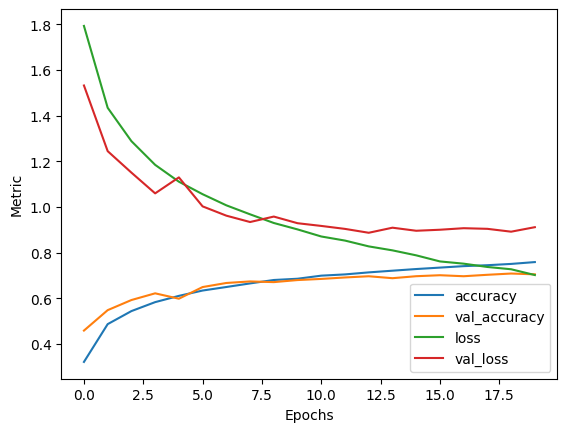

In [42]:
# Adding a new dense layer Dropout 0.4 and 0.3
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend(loc='lower right')

plt.xlabel('Epochs')
plt.ylabel('Metric')

Text(0, 0.5, 'Metric')

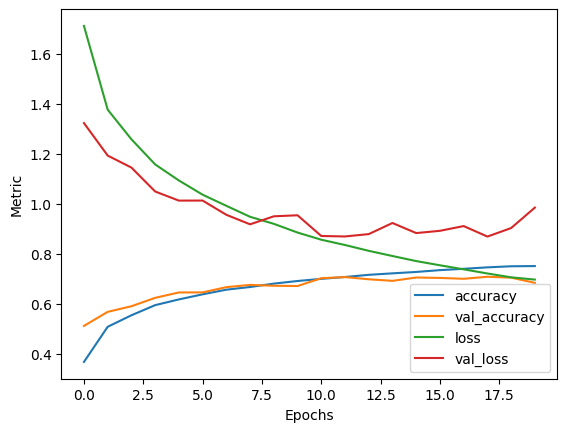

In [38]:
# Dropout 0.5
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend(loc='lower right')

plt.xlabel('Epochs')
plt.ylabel('Metric')

Text(0, 0.5, 'Metric')

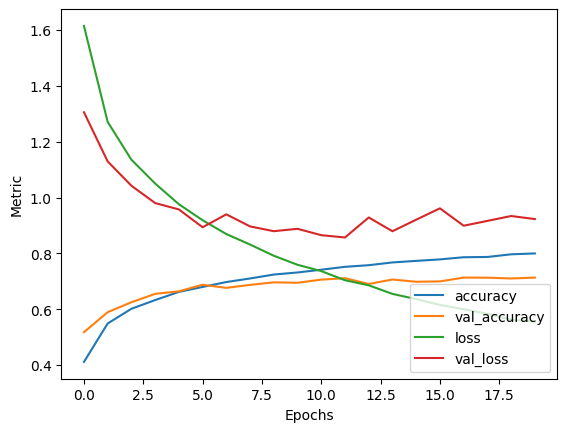

In [34]:
# Dropout 0.3
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend(loc='lower right')

plt.xlabel('Epochs')
plt.ylabel('Metric')

Text(0, 0.5, 'Metric')

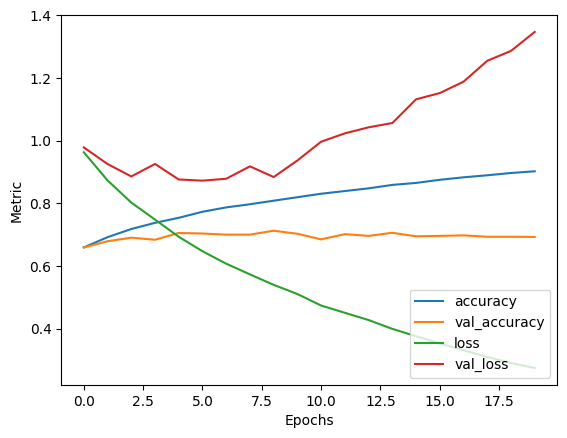

In [29]:
# sin Dropout
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend(loc='lower right')

plt.xlabel('Epochs')
plt.ylabel('Metric')